In [6]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\4114471194.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\state


MAE: 16,947.53
RMSE: 22,232.28


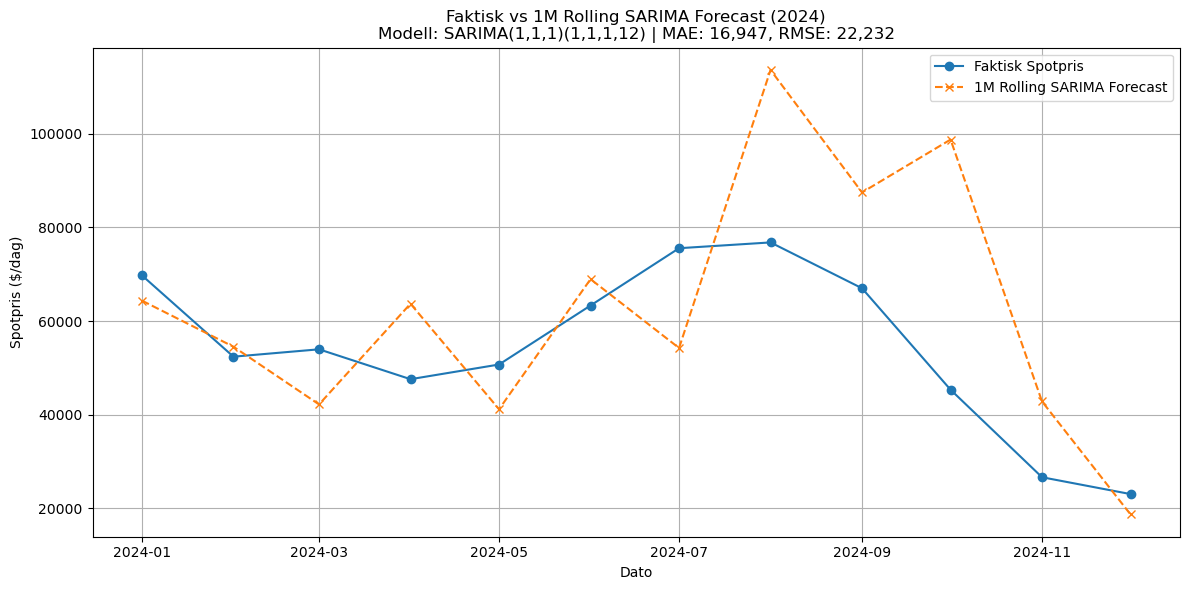

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Last inn og klargjør data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# Faktiske verdier for 2024
actual_2024 = df['2024-01-01':'2024-12-01']['LNG_Spot_Rate']
forecast_dates = actual_2024.index

# === 2. Kjør 1-måned rullerende forecast med fast SARIMA ===
rolling_forecasts = []

for forecast_date in forecast_dates:
    # Treningsdata = alt frem til måneden før
    end_train = forecast_date - pd.DateOffset(months=1)
    train_series = df[:end_train]['LNG_Spot_Rate']
    
    # Log-transformer treningsdata
    log_train = np.log(train_series.dropna())

    # Tren SARIMA-modell
    model = ARIMA(
        log_train,
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 12)
    ).fit()

    # Prognoser log-verdi og transformér tilbake
    forecast = np.exp(model.forecast(steps=1)[0])
    rolling_forecasts.append(forecast)

# === 3. Evaluer ytelsen ===
forecast_series = pd.Series(rolling_forecasts, index=forecast_dates, name="Forecast")
comparison_df = pd.DataFrame({
    "Actual": actual_2024,
    "Forecast": forecast_series
})

mae = mean_absolute_error(comparison_df["Actual"], comparison_df["Forecast"])
rmse = np.sqrt(mean_squared_error(comparison_df["Actual"], comparison_df["Forecast"]))

print(f"\nMAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

# === 4. Plot ===
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df["Actual"], marker='o', label="Faktisk Spotpris")
plt.plot(comparison_df.index, comparison_df["Forecast"], marker='x', linestyle='--', label="1M Rolling SARIMA Forecast")
plt.title(f"Faktisk vs 1M Rolling SARIMA Forecast (2024)\nModell: SARIMA(1,1,1)(1,1,1,12) | MAE: {int(mae):,}, RMSE: {int(rmse):,}")
plt.xlabel("Dato")
plt.ylabel("Spotpris ($/dag)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\2043353151.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=34.515, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=55.988, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=47.233, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.127, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=54.010, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=36.424, Time=1.63 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=35.243, Time=0.30 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=34.607, Time=1.39 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=32.226, Time=0.65 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.55 sec


C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\2043353151.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = np.exp(model.forecast(steps=1)[0])
C:\Users\Eier\anaconda3\Lib\site-packag


MAE: 12,796.24
RMSE: 15,459.00


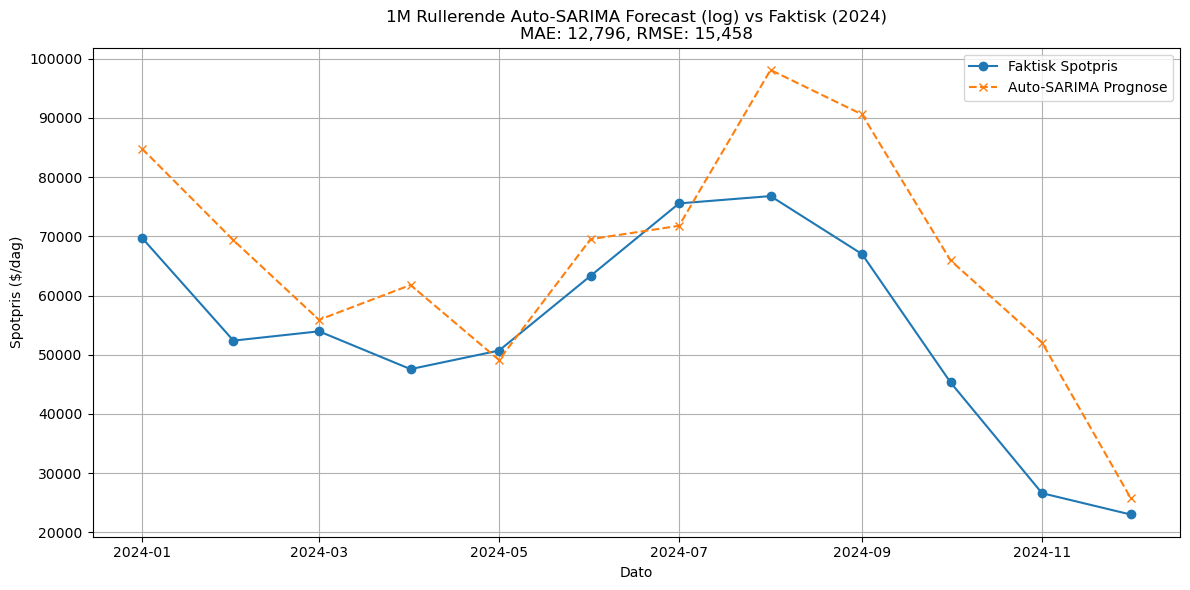


Månedlige MAE og RMSE:

                MAE      RMSE
Month                        
January    15078.36  15078.36
February   16957.93  16957.93
March       1945.69   1945.69
April      14211.20  14211.20
May         1594.69   1594.69
June        6197.95   6197.95
July        3782.65   3782.65
August     21308.45  21308.45
September  23600.50  23600.50
October    20612.57  20612.57
November   25456.43  25456.43
December    2808.41   2808.41


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Last inn og klargjør data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# Del opp data
train_full = df[:'2023-12-01']['LNG_Spot_Rate']
actual_2024 = df['2024-01-01':'2024-12-01']['LNG_Spot_Rate']
forecast_dates = actual_2024.index

# === 2. Kjør auto_arima én gang for å velge modell ===
log_train_full = np.log(train_full.dropna())

auto_model = auto_arima(
    log_train_full,
    seasonal=True,
    m=12,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

# Hent valgte SARIMA-parametere
order = auto_model.order
seasonal_order = auto_model.seasonal_order
print(f"\nBruker SARIMA{order}{seasonal_order} for hele 2024")

# === 3. Rullerende forecast for 2024 med valgte parametere ===
rolling_forecasts = []

for forecast_date in forecast_dates:
    # Treningsdata = alle faktiske data frem til forrige måned
    end_train = forecast_date - pd.DateOffset(months=1)
    train_series = df[:end_train]['LNG_Spot_Rate']
    log_train = np.log(train_series.dropna())

    # Tren SARIMA med faste parametere
    model = ARIMA(
        log_train,
        order=order,
        seasonal_order=seasonal_order
    ).fit()

    # Prognose og tilbake-transformasjon
    forecast = np.exp(model.forecast(steps=1)[0])
    rolling_forecasts.append(forecast)

# === 4. Evaluer og sammenlign med faktisk data ===
forecast_series = pd.Series(rolling_forecasts, index=forecast_dates, name="Forecast")
comparison_df = pd.DataFrame({
    "Actual": actual_2024,
    "Forecast": forecast_series
})

mae = mean_absolute_error(comparison_df["Actual"], comparison_df["Forecast"])
rmse = np.sqrt(mean_squared_error(comparison_df["Actual"], comparison_df["Forecast"]))

print(f"\nMAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

# === 5. Plot resultat ===
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df["Actual"], marker='o', label="Faktisk Spotpris")
plt.plot(comparison_df.index, comparison_df["Forecast"], marker='x', linestyle='--', label="Auto-SARIMA Prognose")
plt.title(f"1M Rullerende Auto-SARIMA Forecast (log) vs Faktisk (2024)\nMAE: {int(mae):,}, RMSE: {int(rmse):,}")
plt.xlabel("Dato")
plt.ylabel("Spotpris ($/dag)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# === 6. Beregn månedlig MAE og RMSE (NYTT) ===
df_eval = pd.DataFrame({
    "Month": forecast_series.index.strftime('%B'),
    "Forecast": forecast_series.values,
    "Actual": actual_2024.values
})
df_eval["Abs_Error"] = abs(df_eval["Forecast"] - df_eval["Actual"])
df_eval["Sq_Error"] = (df_eval["Forecast"] - df_eval["Actual"]) ** 2

monthly_errors = df_eval.groupby("Month").agg(
    MAE=("Abs_Error", "mean"),
    RMSE=("Sq_Error", lambda x: np.sqrt(np.mean(x)))
).reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

monthly_errors_rounded = monthly_errors.round(2)
print("\nMånedlige MAE og RMSE:\n")
print(monthly_errors_rounded)

C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\174815231.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\t

MAE (raw): 26575.935830303057, RMSE (raw): 34102.684238842405


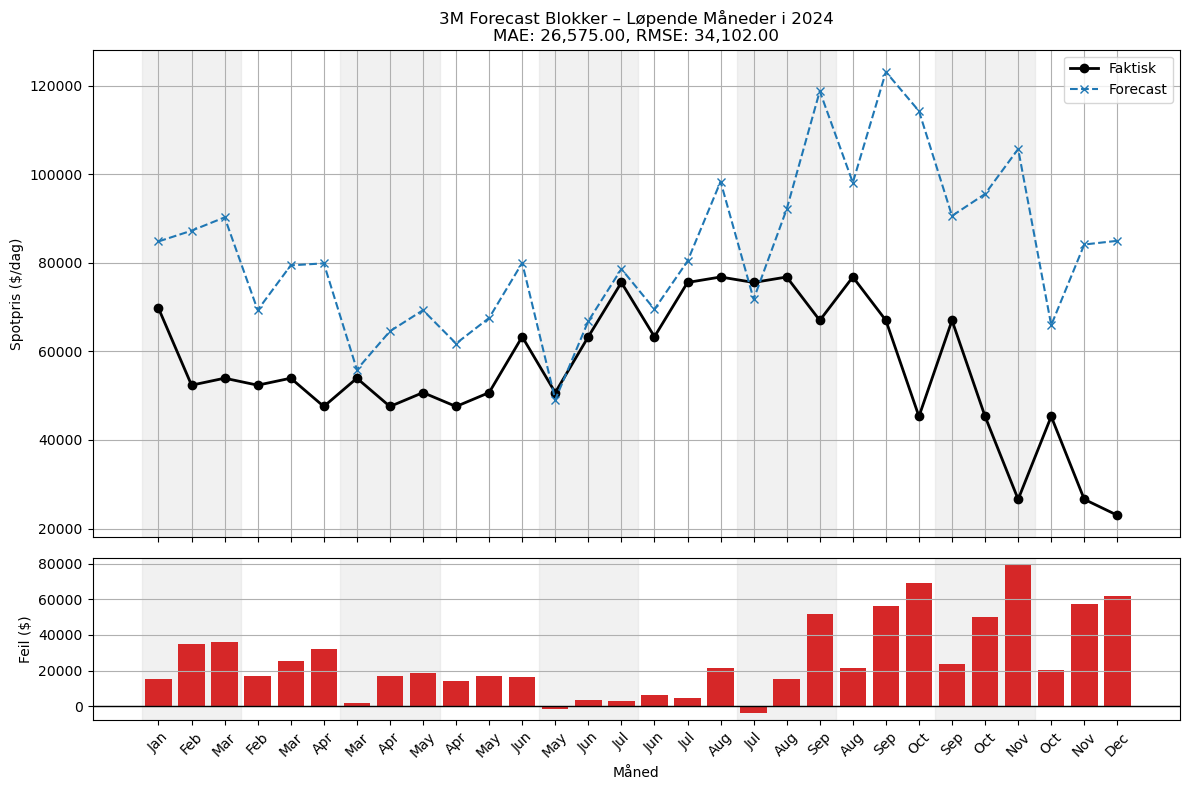


MAE/RMSE per 3M-blokk (tilordnet startmåned):
                MAE      RMSE
Month                        
January    28756.35  30344.87
February   24917.28  25697.11
March      12511.44  14587.17
April      15910.51  15956.02
May         2724.68   2845.91
June       10850.99  13235.15
July       23620.04  31237.76
August     48787.33  52775.65
September  50975.32  55785.09
October    46705.41  50250.24


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Load and prepare data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# === 2. Forecast config ===
order = (1, 1, 2)
seasonal_order = (1, 0, 0, 12)
forecast_start_dates = pd.date_range(start="2024-01-01", end="2024-10-01", freq="MS")

all_forecasts = []
all_actuals = []
forecast_months = []

for start_date in forecast_start_dates:
    train_end = start_date - pd.DateOffset(months=1)
    train_series = df[:train_end]['LNG_Spot_Rate'].dropna()
    forecast_period = pd.date_range(start=start_date, periods=3, freq="MS")

    if not set(forecast_period).issubset(df.index):
        break

    actual = df.loc[forecast_period, 'LNG_Spot_Rate'].dropna()
    if len(actual) < 3:
        break

    log_train = np.log(train_series)
    model = ARIMA(log_train, order=order, seasonal_order=seasonal_order).fit()
    forecast_log = model.forecast(steps=3)
    forecast = np.exp(forecast_log)

    all_forecasts.extend(forecast)
    all_actuals.extend(actual.values)
    forecast_months.extend(forecast_period)

# === 3. Evaluation ===
x = np.arange(1, len(forecast_months) + 1)
month_labels = [d.strftime('%b') for d in forecast_months]
residuals = np.array(all_forecasts) - np.array(all_actuals)
mae = mean_absolute_error(all_actuals, all_forecasts)
rmse = np.sqrt(mean_squared_error(all_actuals, all_forecasts))

# === 4. Plot forecast + residuals with block shading ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Top panel: forecast vs actual
axes[0].plot(x, all_actuals, marker='o', label="Faktisk", color='black', linewidth=2)
axes[0].plot(x, all_forecasts, marker='x', linestyle='--', label="Forecast", color='tab:blue')

# Shade 3M blocks
block_len = 3
block_count = len(x) // block_len
for i in range(block_count):
    if i % 2 == 0:
        axes[0].axvspan(i * block_len + 0.5, (i + 1) * block_len + 0.5, color='lightgray', alpha=0.3)
        axes[1].axvspan(i * block_len + 0.5, (i + 1) * block_len + 0.5, color='lightgray', alpha=0.3)

axes[0].set_title(f"3M Forecast Blokker – Løpende Måneder i 2024\nMAE: {int(mae):,.2f}, RMSE: {int(rmse):,.2f}")
axes[0].set_ylabel("Spotpris ($/dag)")
axes[0].legend()
axes[0].grid(True)

# Bottom panel: residuals
axes[1].bar(x, residuals, color='tab:red')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_ylabel("Feil ($)")
axes[1].set_xlabel("Måned")
axes[1].grid(True, axis='y')
axes[1].set_xticks(x)
axes[1].set_xticklabels(month_labels, rotation=45)

plt.tight_layout()
print(f"MAE (raw): {mae}, RMSE (raw): {rmse}")
plt.show()

# === 6. Gruppér per blokk-start (3M) ===
block_starts = forecast_start_dates[:len(all_forecasts)//3]  # én dato per blokk
block_mae = []
block_rmse = []

for i in range(0, len(all_forecasts), 3):
    f_block = all_forecasts[i:i+3]
    a_block = all_actuals[i:i+3]
    if len(f_block) == 3:
        mae = mean_absolute_error(a_block, f_block)
        rmse = np.sqrt(mean_squared_error(a_block, f_block))
        block_mae.append(mae)
        block_rmse.append(rmse)

df_blocks = pd.DataFrame({
    "Month": block_starts.strftime('%B'),
    "MAE": block_mae,
    "RMSE": block_rmse
}).set_index("Month")

print("\nMAE/RMSE per 3M-blokk (tilordnet startmåned):")
print(df_blocks.round(2))


C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\2308005276.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\

MAE (raw): 30744.726501395377, RMSE (raw): 39183.933358953436


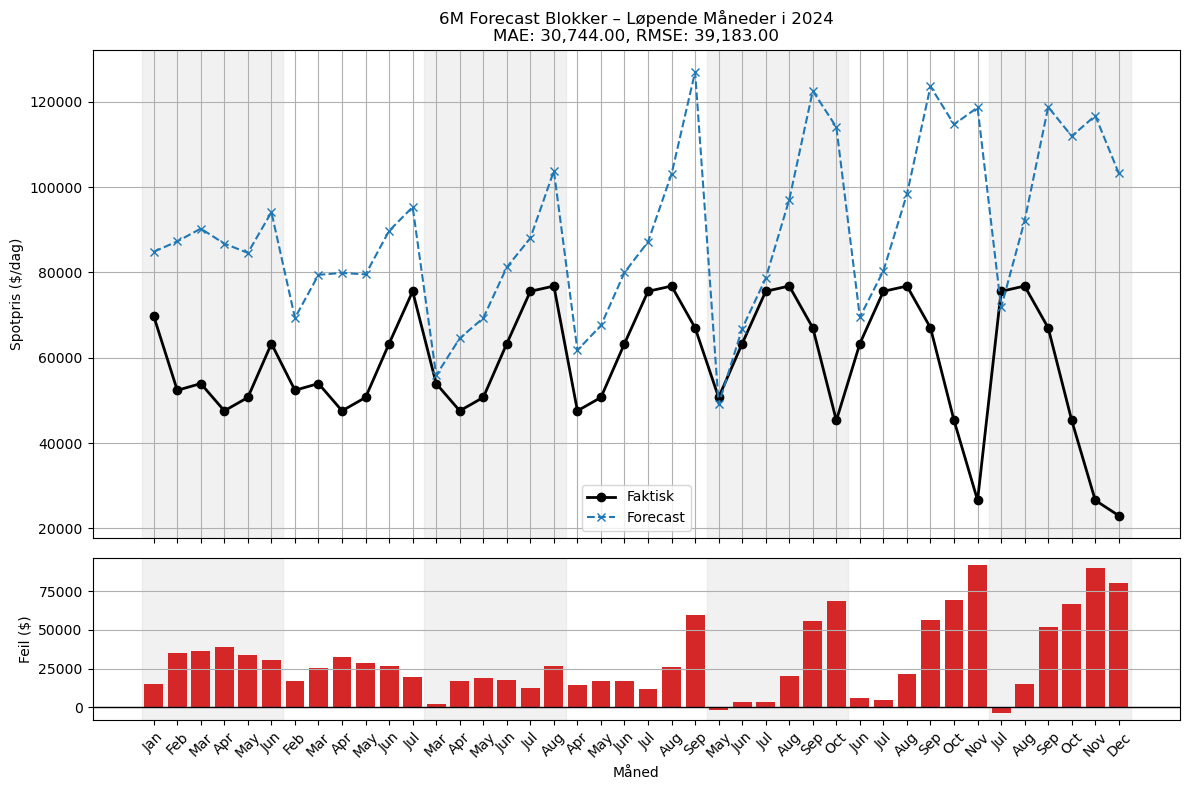

               MAE      RMSE
Month                       
January   31683.42  32639.71
February  24958.94  25496.60
March     15809.85  17517.02
April     24261.03  29395.11
May       25446.39  37060.24
June      41752.65  53239.55
July      51300.80  60443.43


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Load and prepare data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# === 2. Forecast config ===
order = (1, 1, 2)
seasonal_order = (1, 0, 0, 12)
forecast_start_dates = pd.date_range(start="2024-01-01", end="2024-07-01", freq="MS")  # Siste start: Jul 2024

all_forecasts = []
all_actuals = []
forecast_months = []

for start_date in forecast_start_dates:
    train_end = start_date - pd.DateOffset(months=1)
    train_series = df[:train_end]['LNG_Spot_Rate'].dropna()
    forecast_period = pd.date_range(start=start_date, periods=6, freq="MS")

    if not set(forecast_period).issubset(df.index):
        break

    actual = df.loc[forecast_period, 'LNG_Spot_Rate'].dropna()
    if len(actual) < 6:
        break

    log_train = np.log(train_series)
    model = ARIMA(log_train, order=order, seasonal_order=seasonal_order).fit()
    forecast_log = model.forecast(steps=6)
    forecast = np.exp(forecast_log)

    all_forecasts.extend(forecast)
    all_actuals.extend(actual.values)
    forecast_months.extend(forecast_period)

# === 3. Evaluation ===
x = np.arange(1, len(forecast_months) + 1)
month_labels = [d.strftime('%b') for d in forecast_months]
residuals = np.array(all_forecasts) - np.array(all_actuals)
mae = mean_absolute_error(all_actuals, all_forecasts)
rmse = np.sqrt(mean_squared_error(all_actuals, all_forecasts))

# === 4. Plot forecast + residuals with 6M block shading ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Øvre panel: forecast og faktisk
axes[0].plot(x, all_actuals, marker='o', label="Faktisk", color='black', linewidth=2)
axes[0].plot(x, all_forecasts, marker='x', linestyle='--', label="Forecast", color='tab:blue')

# Skyggelegging for 6M-blokker
block_len = 6
block_count = len(x) // block_len
for i in range(block_count):
    if i % 2 == 0:
        axes[0].axvspan(i * block_len + 0.5, (i + 1) * block_len + 0.5, color='lightgray', alpha=0.3)
        axes[1].axvspan(i * block_len + 0.5, (i + 1) * block_len + 0.5, color='lightgray', alpha=0.3)

axes[0].set_title(f"6M Forecast Blokker – Løpende Måneder i 2024\nMAE: {int(mae):,.2f}, RMSE: {int(rmse):,.2f}")
axes[0].set_ylabel("Spotpris ($/dag)")
axes[0].legend()
axes[0].grid(True)

# Nedre panel: residualer
axes[1].bar(x, residuals, color='tab:red')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_ylabel("Feil ($)")
axes[1].set_xlabel("Måned")
axes[1].grid(True, axis='y')
axes[1].set_xticks(x)
axes[1].set_xticklabels(month_labels, rotation=45)

plt.tight_layout()
print(f"MAE (raw): {mae}, RMSE (raw): {rmse}")
plt.show()

# === 5. Monthly MAE and RMSE for each 6M block ===
forecast_blocks = [forecast_months[i:i + 6] for i in range(0, len(forecast_months), 6)]
actual_blocks = [all_actuals[i:i + 6] for i in range(0, len(all_actuals), 6)]
pred_blocks = [all_forecasts[i:i + 6] for i in range(0, len(all_forecasts), 6)]

monthly_mae = []
monthly_rmse = []
start_months = []

for i in range(len(forecast_blocks)):
    actual = np.array(actual_blocks[i])
    forecast = np.array(pred_blocks[i])
    if len(actual) == 6 and len(forecast) == 6:
        mae_val = mean_absolute_error(actual, forecast)
        rmse_val = np.sqrt(mean_squared_error(actual, forecast))
        monthly_mae.append(mae_val)
        monthly_rmse.append(rmse_val)
        start_months.append(forecast_blocks[i][0].strftime('%B'))

df_6m_results = pd.DataFrame({
    "Month": start_months,
    "MAE": monthly_mae,
    "RMSE": monthly_rmse
}).set_index("Month").round(2)

print(df_6m_results)


C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\29561333.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE (raw): 50594.7571692463, RMSE (raw): 58086.366803265824


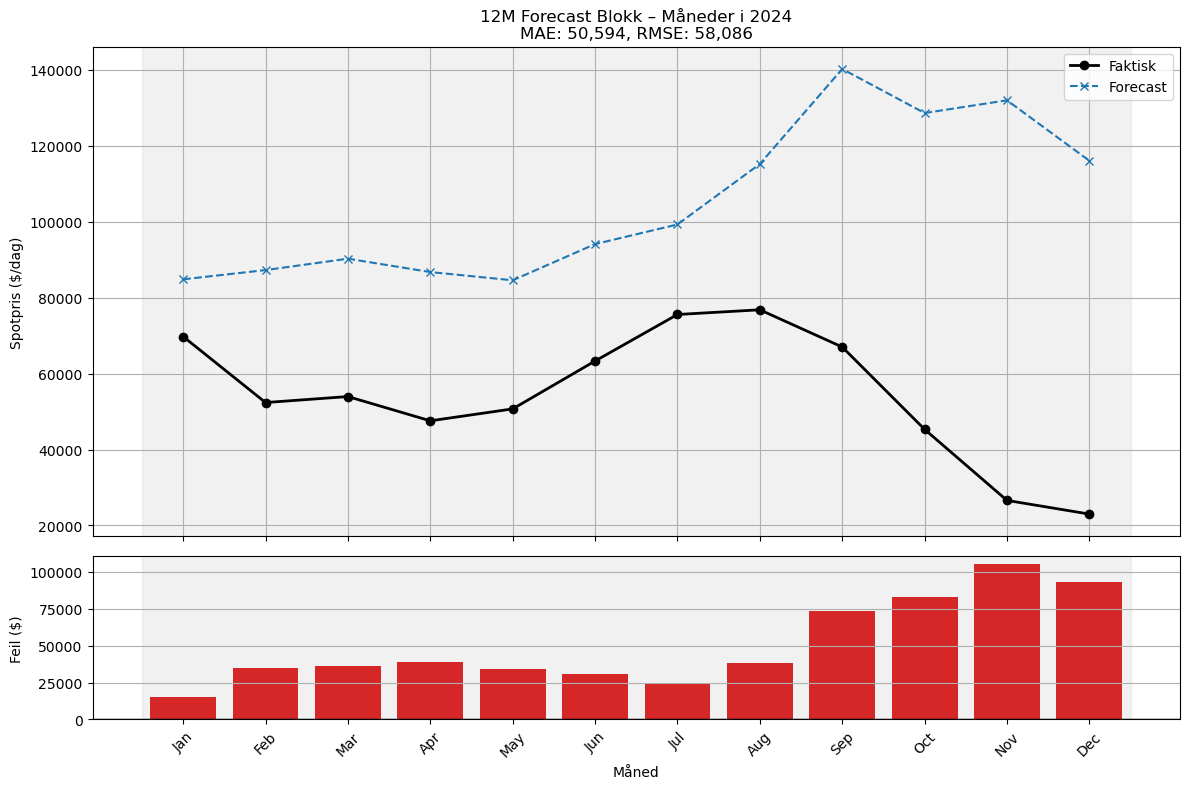

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Load and prepare data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# === 2. Forecast configuration ===
order = (1, 1, 2)
seasonal_order = (1, 0, 0, 12)
start_date = pd.to_datetime("2024-01-01")
forecast_period = pd.date_range(start=start_date, periods=12, freq="MS")

train_end = start_date - pd.DateOffset(months=1)
train_series = df[:train_end]['LNG_Spot_Rate'].dropna()
actual = df.loc[forecast_period, 'LNG_Spot_Rate'].dropna()

# Only run if actual data is available
if len(actual) == 12:
    log_train = np.log(train_series)
    model = ARIMA(log_train, order=order, seasonal_order=seasonal_order).fit()
    forecast_log = model.forecast(steps=12)
    forecast = np.exp(forecast_log)

    # Evaluation
    residuals = forecast - actual.values
    mae = mean_absolute_error(actual.values, forecast)
    rmse = np.sqrt(mean_squared_error(actual.values, forecast))
    x = np.arange(1, 13)
    month_labels = [d.strftime('%b') for d in forecast_period]

    # === 3. Plot forecast + residuals ===
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # Top panel: forecast vs actual
    axes[0].plot(x, actual.values, marker='o', label="Faktisk", color='black', linewidth=2)
    axes[0].plot(x, forecast, marker='x', linestyle='--', label="Forecast", color='tab:blue')

    # Background shading for the block
    axes[0].axvspan(0.5, 12.5, color='lightgray', alpha=0.3)
    axes[1].axvspan(0.5, 12.5, color='lightgray', alpha=0.3)

    axes[0].set_title(f"12M Forecast Blokk – Måneder i 2024\nMAE: {int(mae):,}, RMSE: {int(rmse):,}")
    axes[0].set_ylabel("Spotpris ($/dag)")
    axes[0].legend()
    axes[0].grid(True)

    # Bottom panel: residuals
    axes[1].bar(x, residuals, color='tab:red')
    axes[1].axhline(0, color='black', linewidth=1)
    axes[1].set_ylabel("Feil ($)")
    axes[1].set_xlabel("Måned")
    axes[1].grid(True, axis='y')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(month_labels, rotation=45)

    plt.tight_layout()
    print(f"MAE (raw): {mae}, RMSE (raw): {rmse}")
    plt.show()
else:
    print("Ikke nok faktisk data tilgjengelig for hele 2024.")


C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\3470362685.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\3470362685.py:2

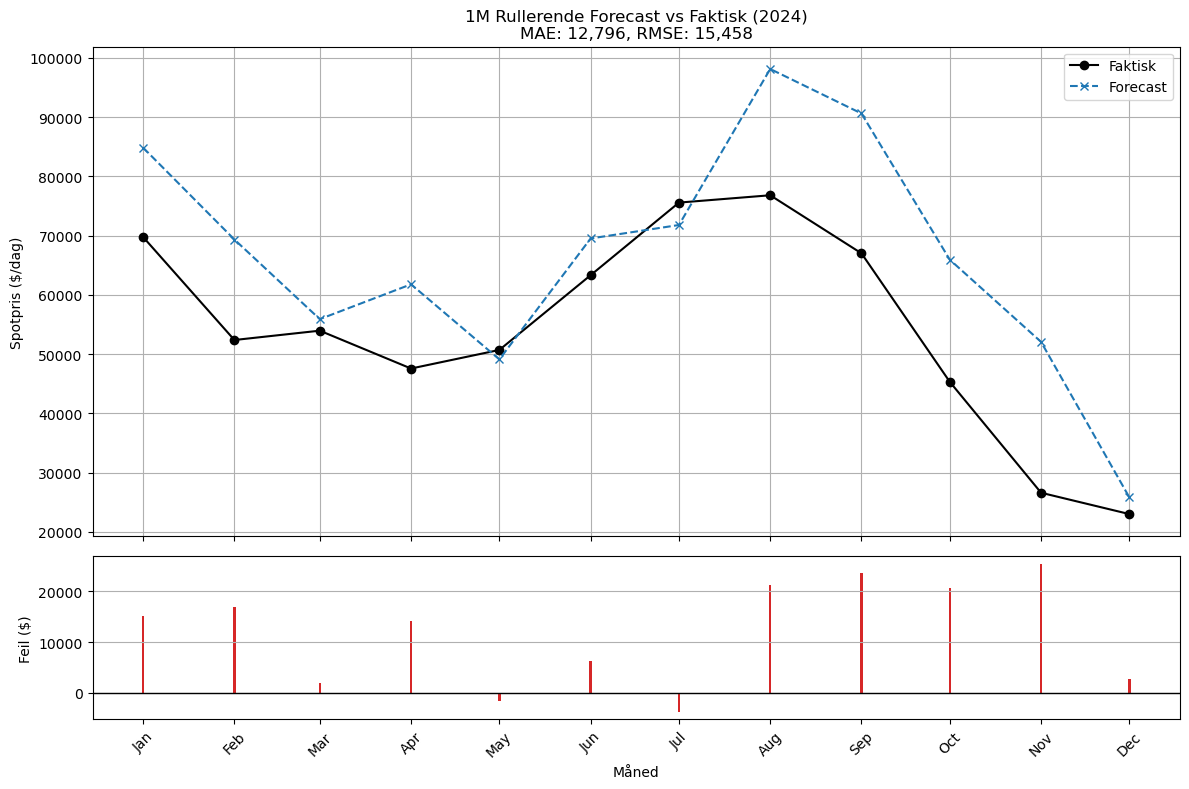

NameError: name 'forecasts' is not defined

In [15]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Load data ===
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)
df["LNG_Spot_Rate"] = pd.to_numeric(df["LNG_Spot_Rate"], errors='coerce')

# === Forecast config ===
train_full = df[:'2023-12-01']['LNG_Spot_Rate']
log_train_full = np.log(train_full.dropna())
auto_model = auto_arima(log_train_full, seasonal=True, m=12, stepwise=True, suppress_warnings=True)
order = auto_model.order
seasonal_order = auto_model.seasonal_order

forecast_dates = pd.date_range(start="2024-01-01", end="2024-12-01", freq="MS")
rolling_forecasts = []

for forecast_date in forecast_dates:
    end_train = forecast_date - pd.DateOffset(months=1)
    train_series = df[:end_train]['LNG_Spot_Rate']
    log_train = np.log(train_series.dropna())
    model = ARIMA(log_train, order=order, seasonal_order=seasonal_order).fit()
    forecast = np.exp(model.forecast(steps=1)[0])
    rolling_forecasts.append(forecast)

# === Evaluate ===
forecast_series = pd.Series(rolling_forecasts, index=forecast_dates)
actual_2024 = df['2024-01-01':'2024-12-01']['LNG_Spot_Rate']
residuals = forecast_series - actual_2024
mae = mean_absolute_error(actual_2024, forecast_series)
rmse = np.sqrt(mean_squared_error(actual_2024, forecast_series))

# === Plot ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
axes[0].plot(actual_2024.index, actual_2024.values, marker='o', label="Faktisk", color='black')
axes[0].plot(forecast_series.index, forecast_series.values, marker='x', linestyle='--', label="Forecast", color='tab:blue')
axes[0].set_title(f"1M Rullerende Forecast vs Faktisk (2024)\nMAE: {int(mae):,}, RMSE: {int(rmse):,}")
axes[0].set_ylabel("Spotpris ($/dag)")
axes[0].legend()
axes[0].grid(True)

axes[1].bar(residuals.index, residuals.values, color='tab:red')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_ylabel("Feil ($)")
axes[1].set_xlabel("Måned")
axes[1].grid(True, axis='y')
axes[1].set_xticks(residuals.index)
axes[1].set_xticklabels([d.strftime('%b') for d in residuals.index], rotation=45)

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# --- 1. Load your data (use your actual CSV/cleaning process)
df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.rename(columns={"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)": "LNG_Spot_Rate"}, inplace=True)

# If you renamed your column, update here:
target = "LNG_Spot_Rate"  # or whatever your column is called

# --- 2. Prepare the log-transformed series (for the full sample, or up to Dec 2023 if you want the static fit)
log_series = np.log(df[target].dropna())
# For static (e.g., 12M), use up to end of 2023:
log_series_static = log_series[:'2023-12-01']

# --- 3. Fit the SARIMA model (update order/seasonal_order to your chosen model)
model_sarima = ARIMA(
    log_series_static, 
    order=(1, 1, 2), 
    seasonal_order=(1, 0, 0, 12)
).fit()

# --- 4. Extract and print summary statistics
summary_dict = {
    "Number of Observations": int(model_sarima.nobs),
    "Log Likelihood": model_sarima.llf,
    "AIC": model_sarima.aic,
    "BIC": model_sarima.bic,
    "HQIC": model_sarima.hqic if hasattr(model_sarima, "hqic") else None,
}

print("SARIMA Model Summary Statistics:")
for k, v in summary_dict.items():
    if v is not None:
        print(f"{k}: {v:.2f}")

# --- 5. For easy LaTeX table building:
latex_rows = "\n".join([
    f"{k} & {v:.2f} \\\\" for k, v in summary_dict.items() if v is not None
])
print("\nLaTeX table rows:\n", latex_rows)


C:\Users\Eier\AppData\Local\Temp\ipykernel_5612\1908235746.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("cleandata.csv", parse_dates=["Date"], dayfirst=True)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA Model Summary Statistics:
Number of Observations: 60.00
Log Likelihood: -10.31
AIC: 30.62
BIC: 41.00
HQIC: 34.67

LaTeX table rows:
 Number of Observations & 60.00 \\
Log Likelihood & -10.31 \\
AIC & 30.62 \\
BIC & 41.00 \\
HQIC & 34.67 \\


In [33]:
params = model_sarima.params
bse = model_sarima.bse
pvalues = model_sarima.pvalues

df_params = pd.DataFrame({
    "Estimate": params,
    "Std. Error": bse,
    "P-value": pvalues
})

print(df_params)


          Estimate  Std. Error       P-value
ar.L1     0.473449    0.153339  2.017773e-03
ma.L1    -0.265145    0.165411  1.089468e-01
ma.L2    -0.680453    0.151676  7.249317e-06
ar.S.L12  0.372066    0.128774  3.861149e-03
sigma2    0.078650    0.012315  1.697671e-10


In [45]:
import numpy as np
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, skew, kurtosis

# === 1. Coefficient Table ===
params = model_sarima.params
conf_int = model_sarima.conf_int()
std_err = model_sarima.bse
pvals = model_sarima.pvalues

coef_table = pd.DataFrame({
    "Estimate": params,
    "Std. Error": std_err,
    "P-value": pvals,
    "CI Lower": conf_int[0],
    "CI Upper": conf_int[1]
})
print("\nSARIMA Parameter Estimates:\n", coef_table)

# === 2. Residual Diagnostics ===
resid = model_sarima.resid

# Ljung-Box (autocorrelation) at lag 1
ljung_box = acorr_ljungbox(resid, lags=[1], return_df=True)
lb_q = ljung_box['lb_stat'].iloc[0]
lb_p = ljung_box['lb_pvalue'].iloc[0]

# Jarque-Bera (normality)
jb_stat, jb_p = jarque_bera(resid)

# Heteroskedasticity (ARCH)
arch_stat, arch_p, _, _ = het_arch(resid)

# Skewness and Kurtosis
skewness = skew(resid)
kurt = kurtosis(resid, fisher=False)

print("\n=== Residual Diagnostics ===")
print(f"Ljung-Box (Q): {lb_q:.2f}   Prob(Q): {lb_p:.2f}")
print(f"Jarque-Bera (JB): {jb_stat:.2f}   Prob(JB): {jb_p:.2f}")
print(f"Heteroskedasticity (H): {arch_stat:.2f}   Prob(H): {arch_p:.2f}")
print(f"Skew: {skewness:.2f}   Kurtosis: {kurt:.2f}")

# === 3. Model Information Criteria ===
print("\n=== Model Fit Criteria ===")
print(f"Log Likelihood: {model_sarima.llf:.2f}")
print(f"AIC: {model_sarima.aic:.2f}")
print(f"BIC: {model_sarima.bic:.2f}")
print(f"HQIC: {model_sarima.hqic:.2f}")



SARIMA Parameter Estimates:
           Estimate  Std. Error       P-value  CI Lower  CI Upper
ar.L1     0.473449    0.153339  2.017773e-03  0.172911  0.773987
ma.L1    -0.265145    0.165411  1.089468e-01 -0.589344  0.059055
ma.L2    -0.680453    0.151676  7.249317e-06 -0.977732 -0.383174
ar.S.L12  0.372066    0.128774  3.861149e-03  0.119673  0.624459
sigma2    0.078650    0.012315  1.697671e-10  0.054513  0.102787

=== Residual Diagnostics ===
Ljung-Box (Q): 0.05   Prob(Q): 0.82
Jarque-Bera (JB): 7002.60   Prob(JB): 0.00
Heteroskedasticity (H): 12.03   Prob(H): 0.28
Skew: 7.13   Kurtosis: 53.96

=== Model Fit Criteria ===
Log Likelihood: -10.31
AIC: 30.62
BIC: 41.00
HQIC: 34.67
